In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Load the MNIST dataset
(train_data, train_labels), (test_data, test_labels) = datasets.mnist.load_data()

# Concatenate the training and test sets
all_data = np.concatenate((train_data, test_data), axis=0)
all_labels = np.concatenate((train_labels, test_labels), axis=0)

# Normalize pixel values between 0 and 1
all_data = all_data / 255.0

# Split the combined dataset into train, validation, and test sets
data_train, data_temp, labels_train, labels_temp = train_test_split(all_data, all_labels, test_size=0.4, random_state=42)
data_val, data_test, labels_val, labels_test = train_test_split(data_temp, labels_temp, test_size=0.5, random_state=42)

# Reshape data for the neural network input
data_train = data_train.reshape(-1, 28, 28, 1)
data_val = data_val.reshape(-1, 28, 28, 1)
data_test = data_test.reshape(-1, 28, 28, 1)

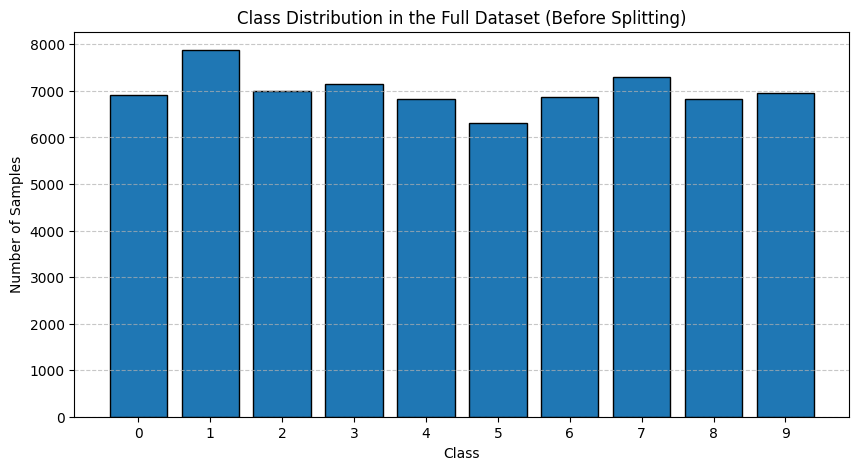

In [13]:
# Class names for MNIST (digits 0 to 9)
class_names = [str(i) for i in range(10)]

# Plot histogram for the full dataset before splitting
plt.figure(figsize=(10, 5))
plt.hist(all_labels, bins=np.arange(11) - 0.5, edgecolor='black', align='mid', rwidth=0.8)
plt.xticks(range(10), class_names)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Full Dataset (Before Splitting)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [14]:
print(all_data.shape[0])
print(data_train.shape[0])
print(data_val.shape[0])
print(data_test.shape[0])
print(labels_test.shape[0])
print(labels_train.shape[0])

70000
42000
14000
14000
14000
42000


In [15]:
all_data = all_data / 255.0

# Split the combined dataset into train, validation, and test sets
data_train, data_temp, labels_train, labels_temp = train_test_split(all_data, all_labels, test_size=0.4, random_state=42)
data_val, data_test, labels_val, labels_test = train_test_split(data_temp, labels_temp, test_size=0.5, random_state=42)

# Reshape data for the neural network input
data_train = data_train.reshape(-1, 28, 28, 1)
data_val = data_val.reshape(-1, 28, 28, 1)
data_test = data_test.reshape(-1, 28, 28, 1)

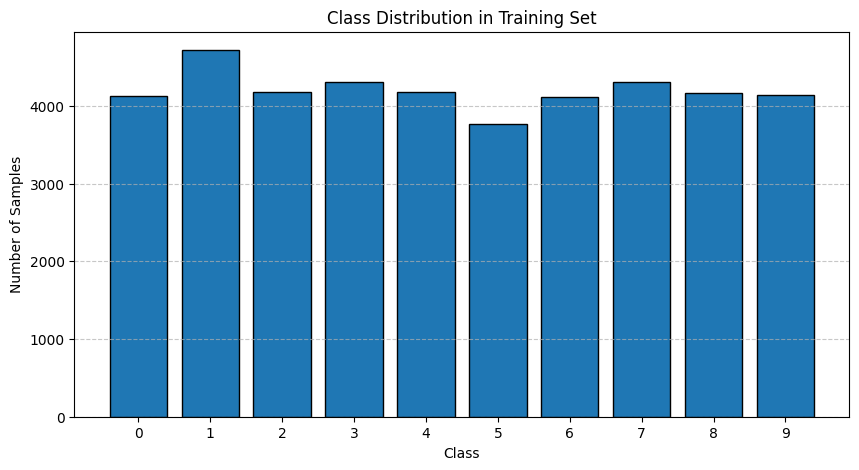

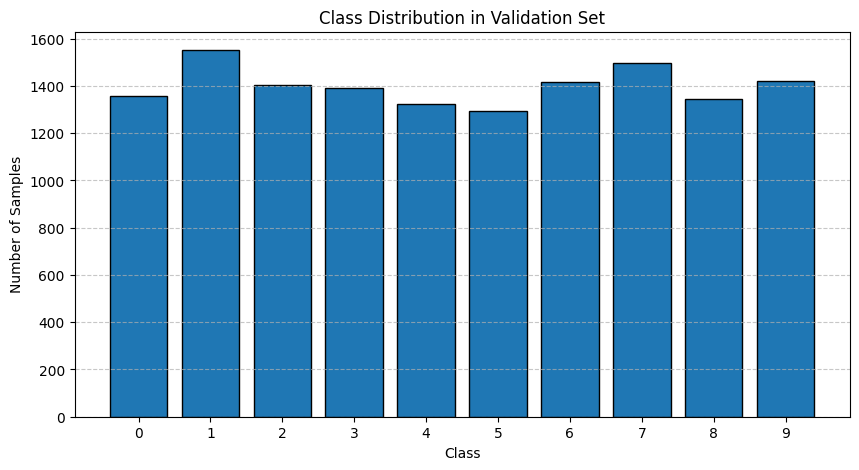

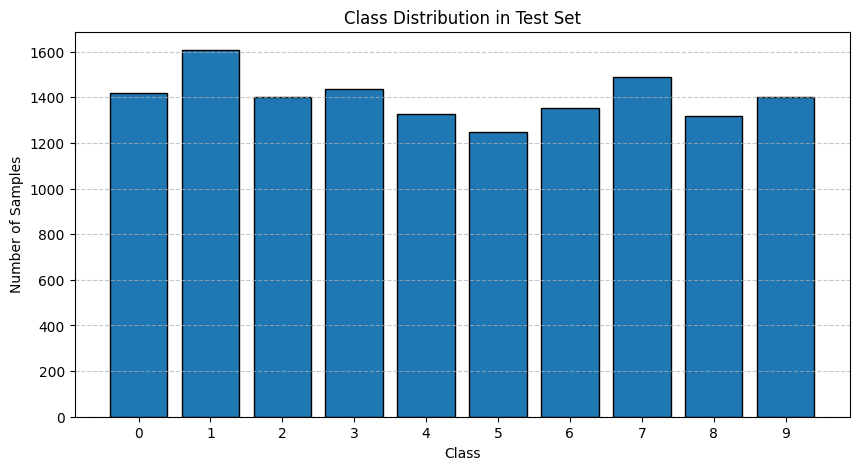

In [16]:
# Class names for MNIST (digits 0 to 9)
class_names = [str(i) for i in range(10)]

# Plot histogram for a given dataset and labels
def plot_histogram(data_labels, title):
    plt.figure(figsize=(10, 5))
    plt.hist(data_labels, bins=np.arange(11) - 0.5, edgecolor='black', align='mid', rwidth=0.8)
    plt.xticks(range(10), class_names)
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot histograms for train, validation, and test sets
plot_histogram(labels_train, 'Class Distribution in Training Set')
plot_histogram(labels_val, 'Class Distribution in Validation Set')
plot_histogram(labels_test, 'Class Distribution in Test Set')


In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') 
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
learning_rate = 0.0001

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(data_train, labels_train, epochs=20, batch_size=1024, validation_data=(data_val, labels_val),verbose=2)

Epoch 1/20
42/42 - 8s - 188ms/step - accuracy: 0.1211 - loss: 2.3018 - val_accuracy: 0.1109 - val_loss: 2.3010
Epoch 2/20
42/42 - 1s - 15ms/step - accuracy: 0.1183 - loss: 2.2997 - val_accuracy: 0.1109 - val_loss: 2.2978
Epoch 3/20
42/42 - 1s - 15ms/step - accuracy: 0.1463 - loss: 2.2940 - val_accuracy: 0.1210 - val_loss: 2.2879
Epoch 4/20
42/42 - 1s - 15ms/step - accuracy: 0.2020 - loss: 2.2764 - val_accuracy: 0.3098 - val_loss: 2.2581
Epoch 5/20
42/42 - 1s - 15ms/step - accuracy: 0.3392 - loss: 2.2235 - val_accuracy: 0.4505 - val_loss: 2.1691
Epoch 6/20
42/42 - 1s - 15ms/step - accuracy: 0.4190 - loss: 2.0858 - val_accuracy: 0.5751 - val_loss: 1.9690
Epoch 7/20
42/42 - 1s - 15ms/step - accuracy: 0.4763 - loss: 1.8523 - val_accuracy: 0.5626 - val_loss: 1.6885
Epoch 8/20
42/42 - 1s - 15ms/step - accuracy: 0.5285 - loss: 1.6070 - val_accuracy: 0.6721 - val_loss: 1.4216
Epoch 9/20
42/42 - 1s - 15ms/step - accuracy: 0.5756 - loss: 1.4008 - val_accuracy: 0.6958 - val_loss: 1.2128
Epoch 10/

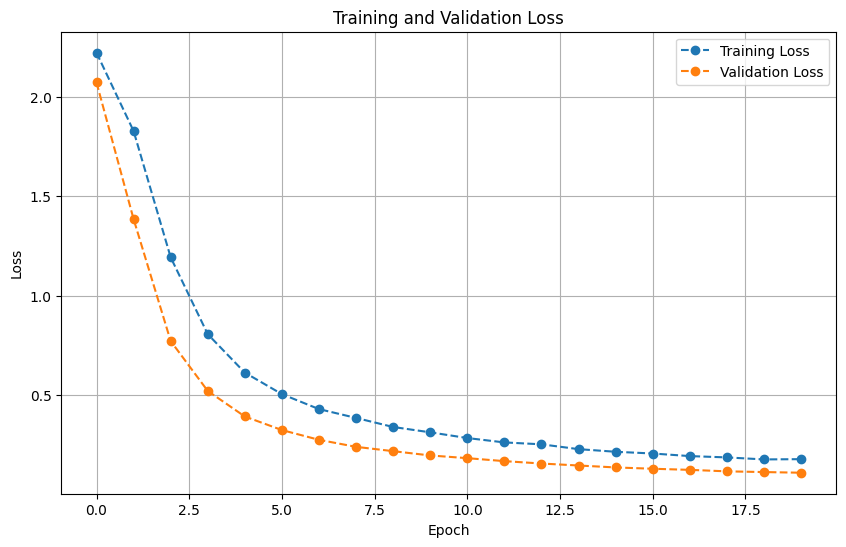

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1419
           1       0.98      0.98      0.98      1607
           2       0.95      0.96      0.95      1403
           3       0.97      0.96      0.96      1437
           4       0.98      0.96      0.97      1326
           5       0.94      0.97      0.95      1249
           6       0.98      0.98      0.98      1351
           7       0.96      0.96      0.96      1488
           8       0.97      0.93      0.95      1319
           9       0.94      0.96      0.95      1401

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



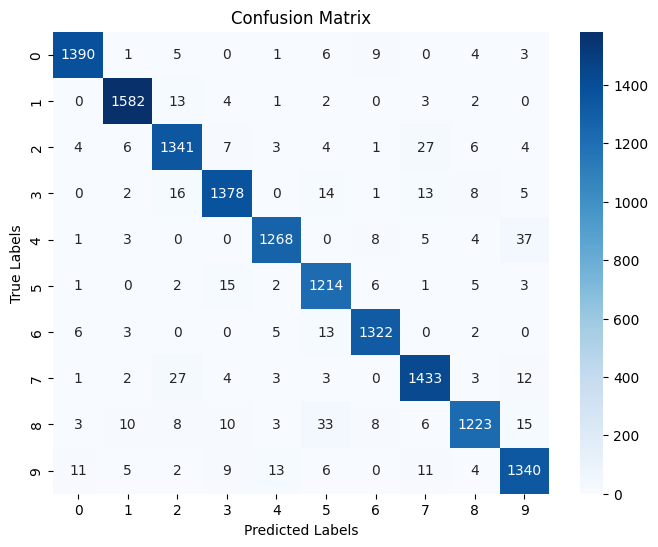

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions from the model
pred = model.predict(data_test)

pred_classes = np.argmax(pred, axis=1)

print(classification_report(labels_test, pred_classes, digits=2))
conf_matrix = confusion_matrix(labels_test, pred_classes)

class_labels = [str(i) for i in range(10)]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [8]:
index = 50 
single_image = X_test[index]

# Reshape the image to fit the input shape of the CNN model (batch size of 1, height, width, channels)
single_image_reshaped = single_image.reshape(1, 28, 28, 1)


prediction = model.predict(single_image_reshaped)
predicted_class = np.argmax(prediction, axis=1)
true_class = labels_test[index]

# Display the image along with the predicted and true class
plt.imshow(single_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_class}, Predicted Label: {predicted_class[0]}")
plt.axis('off')
plt.show()

NameError: name 'X_test' is not defined

In [ ]:
image = cv2.imread("C:/Users/Asus X513/Downloads/downloader.png")
plt.imshow(image)
plt.show()


In [ ]:
def preprocess_image(image):
    gray = cv2.bitwise_not(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)) 
    resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA) 
    return resized / 255.0 

preprocessed_image = preprocess_image(image)
plt.imshow(preprocessed_image, cmap='gray')
plt.axis("off")
plt.title("Preprocessed Image")
plt.show()

input_image = preprocessed_image.reshape(1, 28, 28, 1)
predicted_class = np.argmax(model.predict(input_image), axis=1)[0]
print(f"Predicted class: {predicted_class}")
